# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [115]:
import numpy as np

canoni = np.array([720, 980, 650, 1200])

canoni_iniziali = canoni

spesa_totale = np.sum(canoni)

print(spesa_totale)

canoni = np.where(canoni == 1200, canoni*1.12, canoni)

#per controllare usa np.isclose(canoni, 1344).any, non == perché sono float
if np.isclose(canoni, 1344).any:
    print("ok")

canoni_post_1200 = canoni

print(canoni)

canoni = np.where(canoni == 650, canoni*0.9, canoni)

print(canoni)

canoni = np.where(canoni == 720, canoni*1.05, canoni)
canoni = np.where(canoni == 980, canoni*1.05, canoni)

print(canoni)

nuova_spesa_totale = np.sum(canoni)

print(nuova_spesa_totale)

print((np.sum(canoni_post_1200) - np.sum(canoni_iniziali)))

3550
ok
[ 720.  980.  650. 1344.]
[ 720.  980.  585. 1344.]
[ 756. 1029.  585. 1344.]
3714.0
144.0


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

C:\Users\grayr\AppData\Local\Temp\ipykernel_17488\4292111046.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  camminatore[i] = tmp


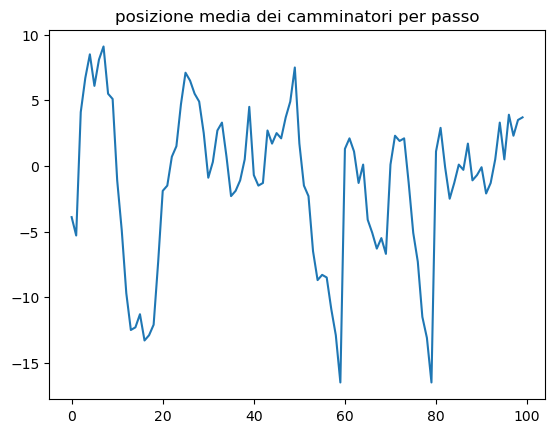

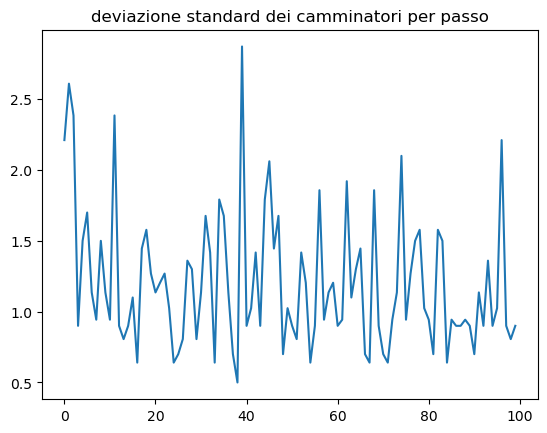

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def simulazione_passi(n, N):
    camminatori = []

    for j in range(N):
        camminatore = np.zeros(n)
        for i in range(1, n):
            passo = np.random.randint(2, size=1)
            if passo == 0:
                passo = -1
            
            tmp = passo + camminatore[i-1]
            camminatore[i] = tmp

        camminatori.append(camminatore)


    camminatori = np.array(camminatori).reshape(n, N)
    medie = np.zeros(n)
    std = np.zeros(n)

    for i in range(n):
        medie[i] = np.mean(camminatori[i])
        std[i] = np.std(camminatori[i])

    return medie, std

medie, std = simulazione_passi(100, 10)

plt.plot(range(100), medie)
plt.title("posizione media dei camminatori per passo")
plt.show()

plt.plot(range(100), std)
plt.title("deviazione standard dei camminatori per passo")
plt.show()

commento:
la deviazione standard tende a 10 secondo una funzione radice.

## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [73]:
import numpy as np

np.random.seed(42)

a = np.array(np.random.normal(loc=0, scale=1, size=(5, 9)))

print(a)

for i in range(5):
    colonne = np.array(range(9))
    righe = np.array([i, i, i, i, i, i, i, i, i])

    elementi = a[righe, colonne]
    
    if np.any(elementi == np.min(abs(elementi - 0.1)) + 0.1):
        print("minimo: {}\n".format(np.min(abs(elementi - 0.1)) + 0.1))
    else:
        print("minimo: {}\n".format(0.1 - np.min(abs(elementi - 0.1))))  


[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]
minimo: -0.13826430117118466

minimo: 0.24196227156603412

minimo: 0.11092258970986608

minimo: -0.013497224737933924

minimo: 0.1713682811899705



## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


In [86]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

     PassengerId  Survived  Pclass  \
737          738         1       1   
679          680         1       1   
258          259         1       1   
88            89         1       1   
341          342         1       1   
438          439         0       1   
27            28         0       1   
742          743         1       1   
311          312         1       1   
299          300         1       1   

                                                Name     Sex   Age  SibSp  \
737                           Lesurer, Mr. Gustave J    male  35.0      0   
679               Cardeza, Mr. Thomas Drake Martinez    male  36.0      0   
258                                 Ward, Miss. Anna  female  35.0      0   
88                        Fortune, Miss. Mabel Helen  female  23.0      3   
341                   Fortune, Miss. Alice Elizabeth  female  24.0      3   
438                                Fortune, Mr. Mark    male  64.0      1   
27                    Fortune, Mr. Charles

C:\Users\grayr\AppData\Local\Temp\ipykernel_17488\1423717642.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['family_index'].fillna(0, inplace=True)


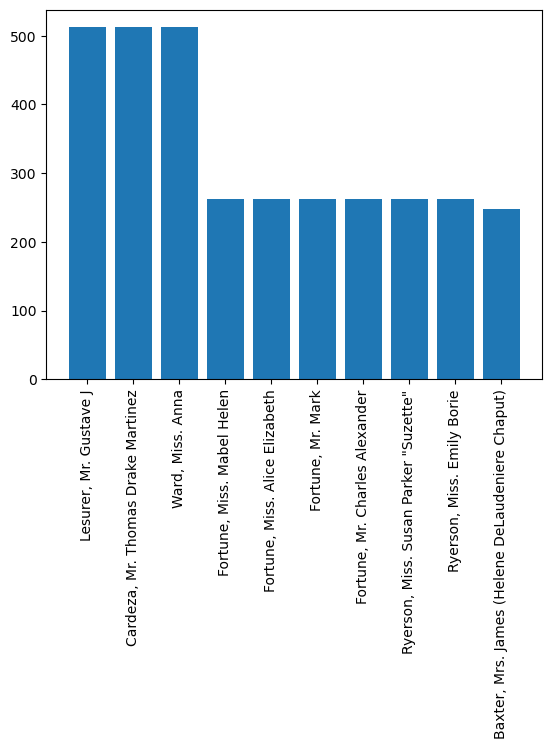

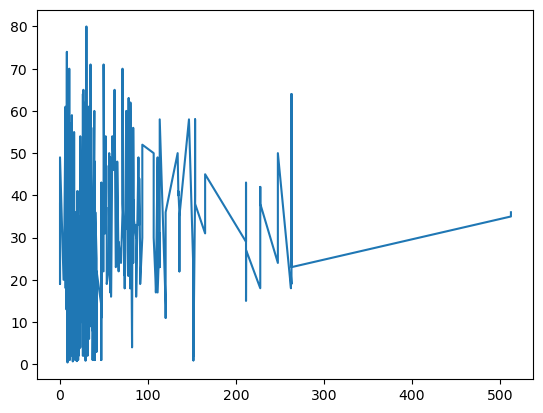

In [127]:
import matplotlib.pyplot as plt

df.dropna(subset=['Age', 'Fare'], inplace=True)

print(df.sort_values(by="Fare", ascending=False).head(10))

print(df['Age'].mean())
print(df['Fare'].mean())
print(df['SibSp'].mean())

df['family_index'] = (df['SibSp'] + df['Parch']) / df['Fare']

df['family_index'].fillna(0, inplace=True)

df['family_index']

print(df.sort_values(by="family_index", ascending=False)['Name'].head(1))

df.query("Fare > 100")

by_fare = df.sort_values(by='Fare', ascending=False).head(10)
plt.bar(by_fare['Name'], by_fare['Fare'])
plt.xticks(rotation=90)
plt.show()

tmp = df.sort_values(by='Fare', ascending=True)[['Age', 'Fare']]
plt.plot(tmp['Fare'], tmp['Age'])
plt.show()

## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


Numero di righe: 344, numero di colonne: 7

Numero di NA per species: 0
Numero di NA per island: 0
Numero di NA per bill_length_mm: 2
Numero di NA per bill_depth_mm: 2
Numero di NA per flipper_length_mm: 2
Numero di NA per body_mass_g: 2
Numero di NA per sex: 11

Numero di righe duplicate: 0

Massa corporea media per la specie Adelie: 3700.662251655629
Massa corporea media per la specie Chinstrap: 3733.0882352941176
Massa corporea media per la specie Gentoo: 5076.016260162602


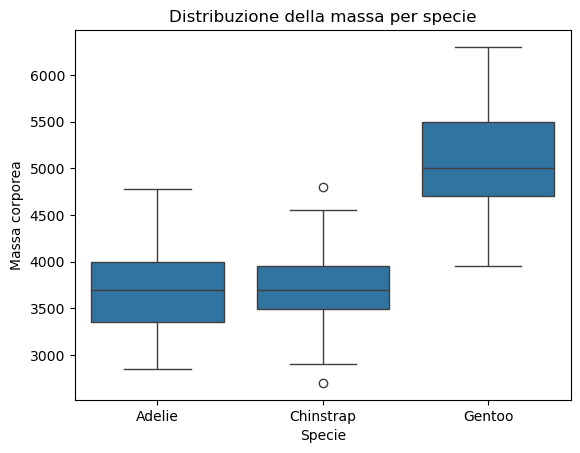

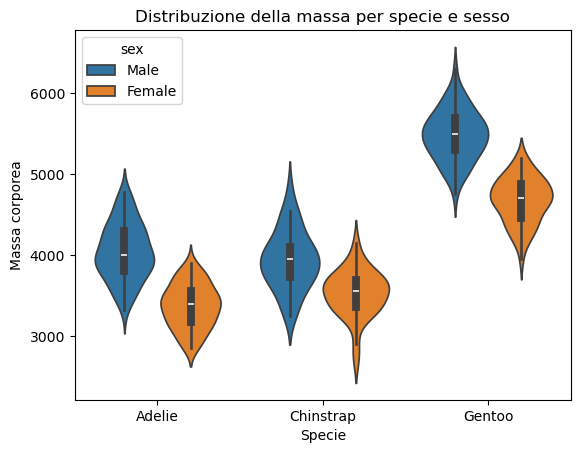

In [33]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
df = pd.DataFrame(penguins)

#1
righe, colonne = df.shape
print("Numero di righe: {}, numero di colonne: {}\n".format(righe, colonne))

#2
for column in pd.unique(df.columns):
    num_na = sum(pd.isna(df[column]))
    print("Numero di NA per {}: {}".format(column, num_na))

#3
moda_sex = df["sex"].mode()
df["sex"] = df["sex"].fillna(moda_sex)

#4
df.dropna(subset = ["body_mass_g"], inplace = True)

#5
print("\nNumero di righe duplicate: {}\n".format(sum(df.duplicated())))

#6
for specie in pd.unique(df["species"]):
    media_massa_specie = df[df["species"] == specie].body_mass_g.mean()
    print("Massa corporea media per la specie {}: {}".format(specie, media_massa_specie))

#7
plt.title("Distribuzione della massa per specie")
sns.boxplot(df, x = "species", y = "body_mass_g")
plt.xlabel("Specie")
plt.ylabel("Massa corporea")
plt.show()

#8
plt.title("Distribuzione della massa per specie e sesso")
sns.violinplot(df, x = "species", y = "body_mass_g", hue = "sex")
plt.xlabel("Specie")
plt.ylabel("Massa corporea")
plt.show()

## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


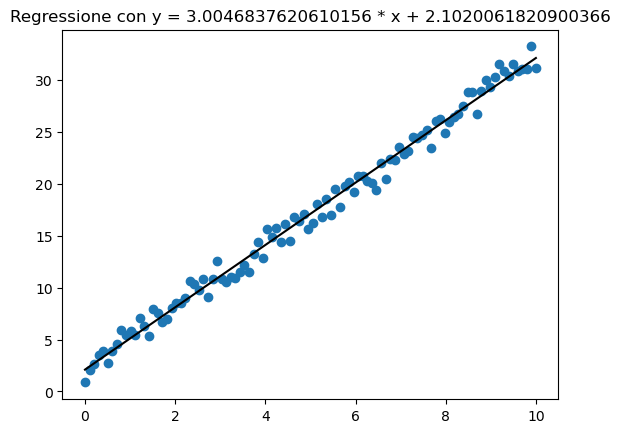

In [130]:
import scipy as sp
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, 100)

def lineare(x, a, b):
    return a * x + b

def fit_line(x, y):
    params, _ = sp.optimize.curve_fit(lineare, x, y)
    a, b = params

    retta = "y = {} * x + {}".format(a, b)
    return (a, b, retta)

a, b , retta = fit_line(x, y)

plt.title("Regressione con {}".format(retta))
plt.scatter(x, y)
plt.plot(x, lineare(x, a, b), color='black')
plt.show()